# Load Dataset

In [114]:
from datasets import load_dataset
import numpy as np
import tensorflow as tf

# Load SMS Spam Collection v.1 dataset
dataset = load_dataset('sms_spam', split = 'train')

# Split dataset into data and labels
X = dataset['sms']
y = dataset['label']

# Label names
label_names = dataset.features['label'].names

# Print label names
print(label_names)

Found cached dataset sms_spam (/Users/berkankutuk/.cache/huggingface/datasets/sms_spam/plain_text/1.0.0/53f051d3b5f62d99d61792c91acefe4f1577ad3e4c216fb0ad39e30b9f20019c)


['ham', 'spam']


## Samples

In [115]:
# Print 5 samples of sms
for i in range(5):
    print(X[i])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

Ok lar... Joking wif u oni...

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

U dun say so early hor... U c already then say...

Nah I don't think he goes to usf, he lives around here though



## Sample of spam sms

In [116]:
# Print only spam sms
for i in range(10):
    if y[i] == 1:
        print(X[i])

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv

WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.

Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030



# Quantitative data exploration

## Total spam and ham values

In [117]:
# Print number of spam sms
spam_count = 0
for i in range(len(y)):
    if y[i] == 1:
        spam_count += 1
print("Spam count:", spam_count)

# Print number of ham sms
ham_count = 0
for i in range(len(y)):
    if y[i] == 0:
        ham_count += 1
print("Ham count ", ham_count)

Spam count: 747
Ham count  4827


## Sentence lengths

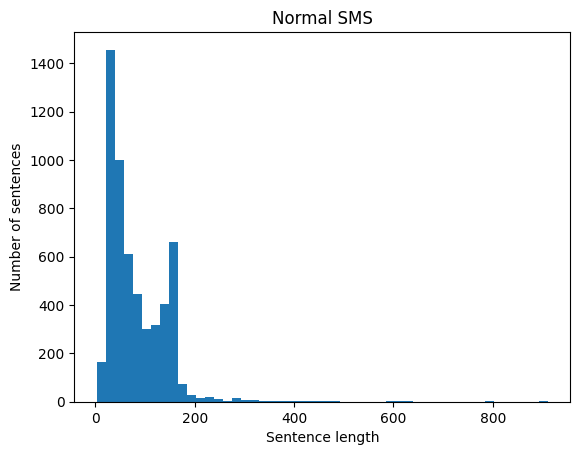

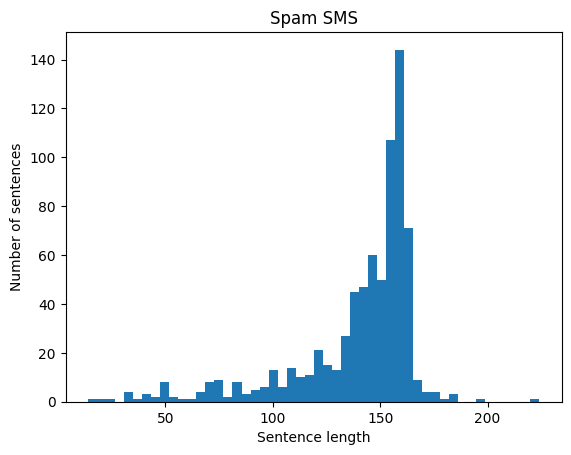

Average sentence length for normal sms: 81.47829207032652
Average sentence length for spam sms: 139.6760374832664
Maximum sentence length for normal sms: 911
Maximum sentence length for spam sms: 224
Minimum sentence length for normal sms: 3
Minimum sentence length for spam sms: 14


In [118]:
# Create a plot over the sentence length distribution
import matplotlib.pyplot as plt
%matplotlib inline

# Create a list of sentence lengths
sentence_lengths = []
for i in range(len(X)):
    sentence_lengths.append(len(X[i]))

# Plot the distribution
plt.hist(sentence_lengths, bins = 50)
plt.title('Normal SMS')
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.show()

# Create a plot over the sentence length distribution for spam sms
# Create a list of sentence lengths
spam_sentence_lengths = []
for i in range(len(X)):
    if y[i] == 1:
        spam_sentence_lengths.append(len(X[i]))

# Plot the distribution
plt.hist(spam_sentence_lengths, bins = 50)
plt.title('Spam SMS')
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.show()

# Print the average sentence length 
print("Average sentence length for normal sms:", np.mean(sentence_lengths))
print("Average sentence length for spam sms:", np.mean(spam_sentence_lengths))

# Print the maximum sentence length 
print("Maximum sentence length for normal sms:", np.max(sentence_lengths))
print("Maximum sentence length for spam sms:", np.max(spam_sentence_lengths))

# Print the minimum sentence length for normal sms
print("Minimum sentence length for normal sms:", np.min(sentence_lengths))
print("Minimum sentence length for spam sms:", np.min(spam_sentence_lengths))



## Total uppercase letters

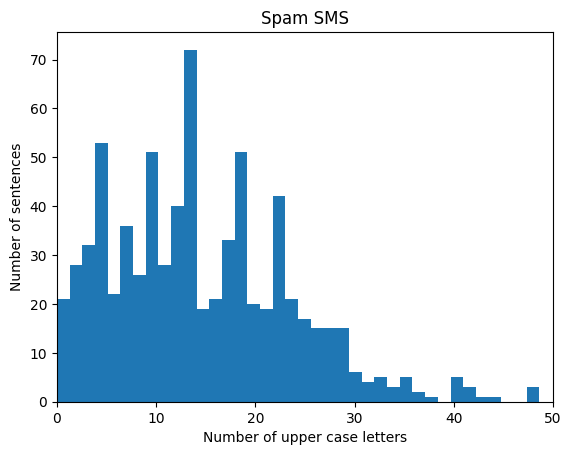

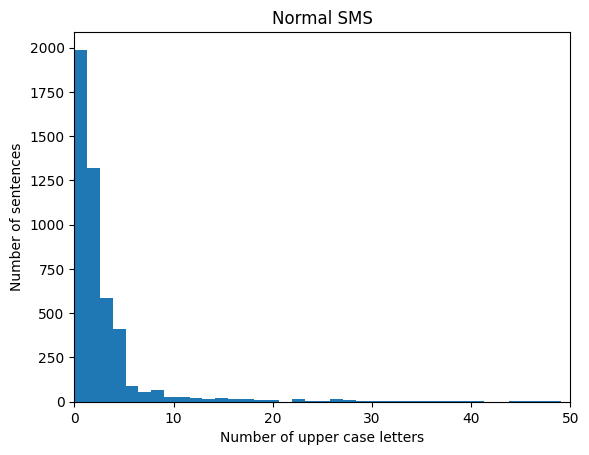

In [119]:
# Create a list of total upper case letters in spam sms
spam_upper_case_letters = []
for i in range(len(y)):
    if y[i] == 1:
        spam_upper_case_letters.append(sum(1 for c in X[i] if c.isupper()))

# Plot the distribution
plt.hist(spam_upper_case_letters, bins = 100)
plt.title('Spam SMS')
plt.xlabel('Number of upper case letters')
plt.ylabel('Number of sentences')
plt.xlim(0, 50)
plt.show()

# Create a plot of total upper case letters in normal sms
normal_upper_case_letters = []
for i in range(len(y)):
    if y[i] == 0:
        normal_upper_case_letters.append(sum(1 for c in X[i] if c.isupper()))

# Plot the distribution
plt.hist(normal_upper_case_letters, bins = 100)
plt.title('Normal SMS')
plt.xlabel('Number of upper case letters')
plt.ylabel('Number of sentences')
plt.xlim(0, 50)
plt.show()

In [120]:
# Count total upper case letters in spam sms
spam_upper_case_letters_count = 0
for i in range(len(y)):
    if y[i] == 1:
        spam_upper_case_letters_count += sum(1 for c in X[i] if c.isupper())

# Count total upper case letters in normal sms
normal_upper_case_letters_count = 0
for i in range(len(y)):
    if y[i] == 0:
        normal_upper_case_letters_count += sum(1 for c in X[i] if c.isupper())

# Print the average number of upper case letters in spam sms
print("Number of upper case letters in spam sms:", spam_upper_case_letters_count)

# Print the average number of upper case letters in normal sms
print("Number of upper case letters in normal sms:", normal_upper_case_letters_count)

# Print the average number of upper case letters in spam sms
print("Average number of upper case letters in spam sms:", np.mean(spam_upper_case_letters))

# Print the average number of upper case letters in normal sms normalized by the sentence length
print("Average number of upper case letters in normal sms:", np.mean(normal_upper_case_letters))

Number of upper case letters in spam sms: 11556
Number of upper case letters in normal sms: 19833
Average number of upper case letters in spam sms: 15.46987951807229
Average number of upper case letters in normal sms: 4.1087632069608455


## Calculate the most common words

In [121]:
# Calculate the most common words from the spam sms
from collections import Counter

# Create a list of all words in the spam sms
spam_words = []
for i in range(len(y)):
    if y[i] == 1:
        for word in X[i].split():
            spam_words.append(word)

# Print the most common words
print("Spam:", Counter(spam_words).most_common(5))

# Calculate the most common words from the normal sms
# Create a list of all words in the normal sms
normal_words = []
for i in range(len(y)):
    if y[i] == 0:
        for word in X[i].split():
            normal_words.append(word)

# Print the most common words
print("\nNormal:", Counter(normal_words).most_common(5))

Spam: [('to', 607), ('a', 360), ('your', 187), ('call', 185), ('or', 185)]

Normal: [('to', 1538), ('you', 1462), ('I', 1439), ('the', 1029), ('a', 977)]


# Preprocessing

## Cleanup

In [122]:
import re

def clean_text(text):
    text = str(text).lower() # lowercase
    #text = re.sub('\[.*?\]', '', text) # remove text in square brackets
    #text = re.sub('https?://\S+|www\.\S+', '', text) # remove urls
    #text = re.sub('<.*?>+', '', text) # remove html tags
    #text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove punctuation
    text = re.sub('\n', '', text) # remove newline characters
    #text = re.sub('\w*\d\w*', '', text) # remove words containing numbers
    return text

# Print only spam sms
print("Before cleanup")
for i in range(3):
    print(X[i])

# Clean the text
X = [clean_text(x) for x in X]

# Print only spam sms
print("\nAfter cleanup")
for i in range(3):
    print(X[i])


Before cleanup
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

Ok lar... Joking wif u oni...

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


After cleanup
go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...
ok lar... joking wif u oni...
free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's


## Stemming

In [123]:
import nltk

stemmer = nltk.PorterStemmer()

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

# Clean the text
#X = [stemm_text(x) for x in X]

# Print samples
for i in range(5):
    print(X[i])

go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...
ok lar... joking wif u oni...
free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's
u dun say so early hor... u c already then say...
nah i don't think he goes to usf, he lives around here though


In [124]:
stemm_text("Jumping")

'jump'

## Stopwords

In [125]:
from nltk.corpus import stopwords

nltk.download('stopwords')

# remove stopwords
stop_words = stopwords.words('english')

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

# Print samples
print("Before cleanup")
for i in range(5):
    print(X[i])

before_sw_cleanup= sum([len(x.split()) for x in X])

# Clean the text
X = [remove_stopwords(x) for x in X]

# Print samples
print("\nAfter cleanup")
for i in range(5):
    print(X[i])

after_sw_cleanup = sum([len(x.split()) for x in X])

print("\nNumber of words before cleanup:", before_sw_cleanup)
print("Number of words after cleanup:", after_sw_cleanup)
print("Number of words removed:", before_sw_cleanup - after_sw_cleanup) # 25616, with lower cased words=31466 


Before cleanup
go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...
ok lar... joking wif u oni...
free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's
u dun say so early hor... u c already then say...
nah i don't think he goes to usf, he lives around here though

After cleanup
go jurong point, crazy.. available bugis n great world la e buffet... cine got amore wat...
ok lar... joking wif u oni...
free entry 2 wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question(std txt rate)t&c's apply 08452810075over18's
u dun say early hor... u c already say...
nah think goes usf, lives around though

Number of words before cleanup: 86908
Number of words after cleanup: 55442
Number of words removed: 31466


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/berkankutuk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [126]:
print(remove_stopwords("hello i am Berkan"))
print(remove_stopwords("there is 10 minutes until the new year"))

hello Berkan
10 minutes new year


## Lemmitization

In [127]:
# import these modules
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
  
def lemmatize_text(text):
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split(' '))
    return text
    
# Print samples
print("Samples before lemmatization")
for i in range(5):
    print(X[i])

# Clean the text
X = [lemmatize_text(x) for x in X]

# Print samples
print("\nSamples after lemmatization")
for i in range(5):
    print(X[i])

Samples before lemmatization
go jurong point, crazy.. available bugis n great world la e buffet... cine got amore wat...
ok lar... joking wif u oni...
free entry 2 wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question(std txt rate)t&c's apply 08452810075over18's
u dun say early hor... u c already say...
nah think goes usf, lives around though


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/berkankutuk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Samples after lemmatization
go jurong point, crazy.. available bugis n great world la e buffet... cine got amore wat...
ok lar... joking wif u oni...
free entry 2 wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question(std txt rate)t&c's apply 08452810075over18's
u dun say early hor... u c already say...
nah think go usf, life around though


# Preparing data

## Splitting Datasets

In [128]:
# split the dataset into training, validation and test set
from sklearn.model_selection import train_test_split

# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42, shuffle=True)

# Split the training set into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1)

# Print the number of samples in the training, validation and test set
print("Number of samples in the training set:", len(X_train))
print("Number of samples in the validation set:", len(X_val))
print("Number of samples in the test set:", len(X_test))

# Print the number of spam sms in the training, validation and test set
print("\nNumber of spam sms in the training set:", sum(y_train))
print("Number of spam sms in the validation set:", sum(y_val))
print("Number of spam sms in the test set:", sum(y_test))

# Print the number of normal sms in the training, validation and test set
print("\nNumber of normal sms in the training set:", len(y_train) - sum(y_train))
print("Number of normal sms in the validation set:", len(y_val) - sum(y_val))
print("Number of normal sms in the test set:", len(y_test) - sum(y_test))

Number of samples in the training set: 5016
Number of samples in the validation set: 558
Number of samples in the test set: 558

Number of spam sms in the training set: 664
Number of spam sms in the validation set: 83
Number of spam sms in the test set: 80

Number of normal sms in the training set: 4352
Number of normal sms in the validation set: 475
Number of normal sms in the test set: 478


## Class weights

In [129]:
from sklearn.utils import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

## Vectorization

In [130]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
#vect.fit(X_train)

#print("Number of features:", len(vect.get_feature_names()))

## Tokenization

In [131]:
# Create word dictionary
import numpy as np
import stanza
from keras.preprocessing.text import Tokenizer

nlp = stanza.Pipeline(lang='en', processors='tokenize')

def tokenize(samples):
    result = []
    for sample in samples:
        doc = nlp(sample)
        tokens = []
        for i, sentence in enumerate(doc.sentences):
            tokens.extend([token.text for token in sentence.tokens])
        result.append(tokens)
    return result

print('Before tokenization')
for i in range(3):
    print(X_train[i], y_train[i])

X_train = tokenize(X_train)

# Print first 3 samples
print('\nAfter tokenization')
for i in range(3):
    print(X_train[i], y_train[i])

X_val = tokenize(X_val)
X_test = tokenize(X_test)

tok = Tokenizer()

# Fit on x_train_pre
tok.fit_on_texts(X_train) #Builds the word index

# Get word_index for inspection
word_index = tok.word_index
max_words = len(word_index) + 1

print('\nFound {} unique tokens.'.format(len(word_index)))
print("\nTop x words in word_index dictionary:\n", list(word_index.items())[:5])

2022-12-21 03:46:42 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2022-12-21 03:46:43 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |

2022-12-21 03:46:43 INFO: Use device: cpu
2022-12-21 03:46:43 INFO: Loading: tokenize
2022-12-21 03:46:43 INFO: Done loading processors!


Before tokenization
hen night. going swing 0
plan family set stone ? 0
cant pick phone right now. pls send message 0

After tokenization
['hen', 'night', '.', 'going', 'swing'] 0
['plan', 'family', 'set', 'stone', '?'] 0
['cant', 'pick', 'phone', 'right', 'now', '.', 'pls', 'send', 'message'] 0

Found 8696 unique tokens.

Top x words in word_index dictionary:
 [('.', 1), (',', 2), ('?', 3), ('u', 4), ('...', 5)]


## Pad Sequences

In [132]:
import tensorflow as tf

max_len = 50

# Convert the text to sequences
X_train_seq = tok.texts_to_sequences(X_train)
X_val_seq = tok.texts_to_sequences(X_val)
X_test_seq = tok.texts_to_sequences(X_test)

# Pad the sequences
X_train_seq = tf.keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=max_len, padding='pre', truncating='pre')
X_val_seq = tf.keras.preprocessing.sequence.pad_sequences(X_val_seq, maxlen=max_len, padding='pre', truncating='pre')
X_test_seq = tf.keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=max_len, padding='pre', truncating='pre')

y_test = np.array(y_test)

for i in range(3):
    print(X_train[i], y_train[i])

['hen', 'night', '.', 'going', 'swing'] 0
['plan', 'family', 'set', 'stone', '?'] 0
['cant', 'pick', 'phone', 'right', 'now', '.', 'pls', 'send', 'message'] 0


## Pretrained word embeddings

### FastText

In [133]:
#Downloads English Fasttext word embeddings
#!pip install fasttext
import fasttext.util
from tqdm.notebook import tqdm
fasttext.util.download_model('en', if_exists='ignore') 

#Load model
ft_model = fasttext.load_model('./cc.en.300.bin') 

embedding_dim=ft_model.get_dimension() #Get word embedding dimension
print("Embedding:", embedding_dim)

embedding_matrix_ft = np.zeros((max_words, embedding_dim))
print(embedding_matrix_ft.shape)
for word, i in tqdm(word_index.items()):
    if i < max_words:
        embedding_matrix_ft[i] = ft_model[word] #Add words to matrix
print("Are word embedding marix and word_index aligned?: {}".format(np.array_equal(ft_model['movie'], embedding_matrix_ft[word_index['movie']])))

Embedding: 300
(8697, 300)


  0%|          | 0/8696 [00:00<?, ?it/s]

Are word embedding marix and word_index aligned?: True


### GloVe

In [1213]:
# Download english embeddings from https://nlp.stanford.edu/projects/glove/ 
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip -q glove.6B.zip

# Add directory of your word embeddings
glove_dir = './glove.6B.100d.txt'
embeddings_index = {} #Dictionary for our word embeddings

#Load embeddings into dictionary
f = open(glove_dir, encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found {} word vectors.'.format(len(embeddings_index)))

#Preparing the GloVe word-embeddings matrix
embedding_dim=100

#Create our embedding matrix
embedding_matrix = np.zeros((max_words, embedding_dim))
oov_words=[]

for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word) 
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector #Add words to matrix
        else:
            oov_words.append(word) #words not in vocab! They will get zero-vectors
print("\nnumber of OOV words: ", len(oov_words), "\nExamples:")
oov_words.sort()
print(oov_words[20:30])

Found 400000 word vectors.

number of OOV words:  2959 
Examples:
["'uptown", "'wnevr", "'xam", '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789']


### Gensim

In [24]:
#Gensim has the following pretrained models ready to load:  
# 'conceptnet-numberbatch-17-06-300': ConceptNet Numberbatch consists of state-of-the-art semantic vectors
# 'fasttext-wiki-news-subwords-300': 1 million word vectors trained on Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens).
# 'glove-twitter-100': Pre-trained vectors based on  2B tweets, 27B tokens, 1.2M vocab, uncased.
# 'glove-twitter-200': Pre-trained vectors based on 2B tweets, 27B tokens, 1.2M vocab, uncased.
# 'glove-twitter-25': Pre-trained vectors based on 2B tweets, 27B tokens, 1.2M vocab, uncased.
# 'glove-twitter-50': Pre-trained vectors based on 2B tweets, 27B tokens, 1.2M vocab, uncased.
# 'glove-wiki-gigaword-100': Pre-trained vectors based on Wikipedia 2014 + Gigaword 5.6B tokens, 400K vocab, uncased.
# 'glove-wiki-gigaword-200': Pre-trained vectors based on Wikipedia 2014 + Gigaword, 5.6B tokens, 400K vocab, uncased.
# 'glove-wiki-gigaword-300': Pre-trained vectors based on Wikipedia 2014 + Gigaword, 5.6B tokens, 400K vocab, uncased.
# 'glove-wiki-gigaword-50': Pre-trained vectors based on Wikipedia 2014 + Gigaword, 5.6B tokens, 400K vocab, uncased.
# 'word2vec-google-news-300': Pre-trained vectors trained on a part of the Google News dataset (about 100 billion words). The model contains 300-dimensional vectors for 3 million words and phrases.
# 'word2vec-ruscorpora-300': Word2vec Continuous Skipgram vectors trained on full Russian National Corpus (about 250M words).

import gensim
from gensim.models.word2vec import Word2Vec
from gensim.test.utils import datapath
from gensim.models import KeyedVectors
from gensim.models.fasttext import load_facebook_model
import gensim.downloader as api
model = api.load("fasttext-wiki-news-subwords-300")

#Define embedding dimensions
embedding_dim=300

#Create our embedding matrix
embedding_matrix = np.zeros((max_words, embedding_dim))
oov_words=[]

for word, i in word_index.items():
    if i < max_words: 
        if model.has_index_for(word):
            embedding_matrix[i] = model.get_vector(word) #Add words to matrix
        else:
            oov_words.append(word) #words not in vocab! They will get zero-vectors
print("\nnumber of OOV words: ", len(oov_words), "\nExamples:")
oov_words.sort()
print(oov_words[20:30])


number of OOV words:  2439 
Examples:
['&100txt', '&amp', '&cs', '&gt', '&it', '&lt', '&lt;#&gt', '&othrs', '&pairs&all', '&sam']


# Model

## CNN

In [172]:
# Create a model using cnn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D, Embedding, GlobalMaxPooling1D
from keras.models import Model

def CNN():
    inputs = Input(shape=(max_len,))

    x = Embedding(
        max_words, 
        embedding_dim,
        weights=[embedding_matrix_ft],
        trainable=False,
    )(inputs)

    x = Conv1D(128, 3, activation='relu')(x)
    x = MaxPooling1D(2)(x)
    x = Dropout(0.2)(x)
    x = Conv1D(64, 3, activation='relu')(x)
    
    x = Flatten()(x)

    x = Dense(32, activation='relu')(x)
    x = Dense(2, activation='softmax')(x)

    model = Model(inputs=inputs,outputs=x)

    opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    return model

model1 = CNN()
model1.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding_19 (Embedding)    (None, 50, 300)           2609100   
                                                                 
 conv1d_8 (Conv1D)           (None, 48, 128)           115328    
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 24, 128)          0         
 1D)                                                             
                                                                 
 dropout_17 (Dropout)        (None, 24, 128)           0         
                                                                 
 conv1d_9 (Conv1D)           (None, 22, 64)            24640     
                                                          

## RNN

In [188]:
import numpy as np
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding

def RNN():
    inputs = Input(name='inputs', shape=[max_len])

    layer = Embedding(
        max_words, 
        embedding_dim,
        input_length=None, 
        weights=[embedding_matrix_ft], 
        trainable=False
    )(inputs)
    layer = LSTM(64)(layer)
    layer = Dropout(0.5)(layer)
    
    layer = Flatten()(layer)

    layer = Dense(64, activation='relu')(layer)
    layer = Dense(2, activation='softmax')(layer)
    
    model = Model(inputs=inputs, outputs=layer)

    opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

model2 = RNN()
model2.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 50)]              0         
                                                                 
 embedding_21 (Embedding)    (None, 50, 300)           2609100   
                                                                 
 lstm_16 (LSTM)              (None, 64)                93440     
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 flatten_21 (Flatten)        (None, 64)                0         
                                                                 
 dense_42 (Dense)            (None, 64)                4160      
                                                                 
 dense_43 (Dense)            (None, 2)                 130

# Training

In [173]:
# Train CNN model
history1 = model1.fit(
    X_train_seq, 
    np.asarray(y_train),
    batch_size=64,
    epochs=5, 
    class_weight=class_weights_dict, 
    validation_data=(X_val_seq, np.asarray(y_val)))

model1.save('CNN_classifier.h5')  # creates a HDF5 file 'my_model.h5'

Epoch 1/5
79/79 [==============================] - 3s 24ms/step - loss: 0.2726 - accuracy: 0.8726 - val_loss: 0.0850 - val_accuracy: 0.9803
Epoch 2/5
79/79 [==============================] - 2s 21ms/step - loss: 0.1074 - accuracy: 0.9663 - val_loss: 0.0782 - val_accuracy: 0.9749
Epoch 3/5
79/79 [==============================] - 2s 20ms/step - loss: 0.0580 - accuracy: 0.9858 - val_loss: 0.0719 - val_accuracy: 0.9821
Epoch 4/5
79/79 [==============================] - 2s 20ms/step - loss: 0.0259 - accuracy: 0.9932 - val_loss: 0.0704 - val_accuracy: 0.9839
Epoch 5/5
79/79 [==============================] - 2s 21ms/step - loss: 0.0254 - accuracy: 0.9940 - val_loss: 0.0987 - val_accuracy: 0.9767


In [189]:
# Train RNN model
history2 = model2.fit(
    X_train_seq, 
    np.asarray(y_train),
    batch_size=32,
    epochs=5, 
    class_weight=class_weights_dict, 
    validation_data=(X_val_seq, np.asarray(y_val)))

model2.save('RNN_classifier.h5') 

Epoch 1/5
157/157 [==============================] - 7s 27ms/step - loss: 0.2714 - accuracy: 0.9348 - val_loss: 0.1119 - val_accuracy: 0.9695
Epoch 2/5
157/157 [==============================] - 3s 22ms/step - loss: 0.1318 - accuracy: 0.9607 - val_loss: 0.0860 - val_accuracy: 0.9785
Epoch 3/5
157/157 [==============================] - 4s 22ms/step - loss: 0.0916 - accuracy: 0.9769 - val_loss: 0.0885 - val_accuracy: 0.9749
Epoch 4/5
157/157 [==============================] - 3s 22ms/step - loss: 0.0798 - accuracy: 0.9789 - val_loss: 0.1288 - val_accuracy: 0.9642
Epoch 5/5
157/157 [==============================] - 4s 22ms/step - loss: 0.0666 - accuracy: 0.9815 - val_loss: 0.0772 - val_accuracy: 0.9767


# Evaluation

## CNN

In [175]:
# Validation accuracy
test_sequences = tok.texts_to_sequences(X_val)
test_sequences_matrix = tf.keras.preprocessing.sequence.pad_sequences(test_sequences,maxlen=max_len)
accr = model1.evaluate(test_sequences_matrix,np.asarray(y_val))

print('Validation set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

# Test accuracy
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = tf.keras.preprocessing.sequence.pad_sequences(test_sequences,maxlen=max_len)
accr = model1.evaluate(test_sequences_matrix,np.asarray(y_test))

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

18/18 [==============================] - 0s 4ms/step - loss: 0.0987 - accuracy: 0.9767
Validation set
  Loss: 0.099
  Accuracy: 0.977
18/18 [==============================] - 0s 4ms/step - loss: 0.0275 - accuracy: 0.9928
Test set
  Loss: 0.028
  Accuracy: 0.993


## RNN

In [176]:
# Validation accuracy
test_sequences = tok.texts_to_sequences(X_val)
test_sequences_matrix = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=max_len)
accr = model2.evaluate(test_sequences_matrix,np.asarray(y_val))

print('Validation set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

# Test accuracy
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=max_len)
accr = model2.evaluate(test_sequences_matrix,np.asarray(y_test))

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

18/18 [==============================] - 0s 11ms/step - loss: 0.1040 - accuracy: 0.9731
Validation set
  Loss: 0.104
  Accuracy: 0.973
18/18 [==============================] - 0s 10ms/step - loss: 0.0591 - accuracy: 0.9767
Test set
  Loss: 0.059
  Accuracy: 0.977


## Training and validation accuracy

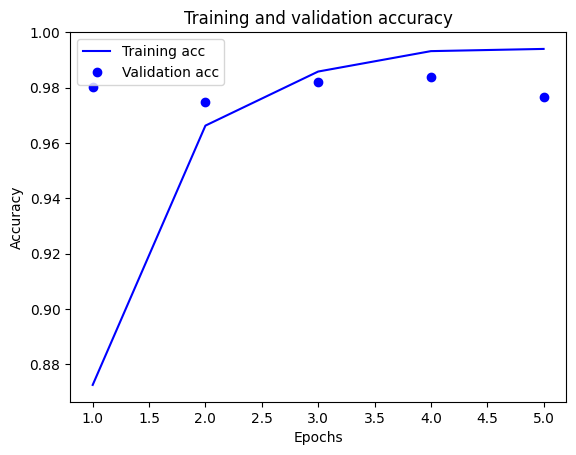

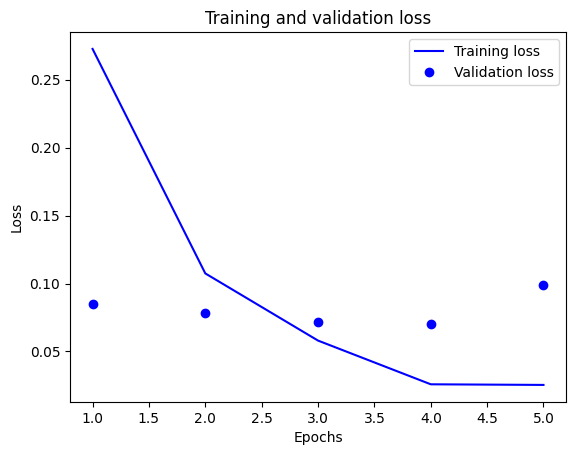

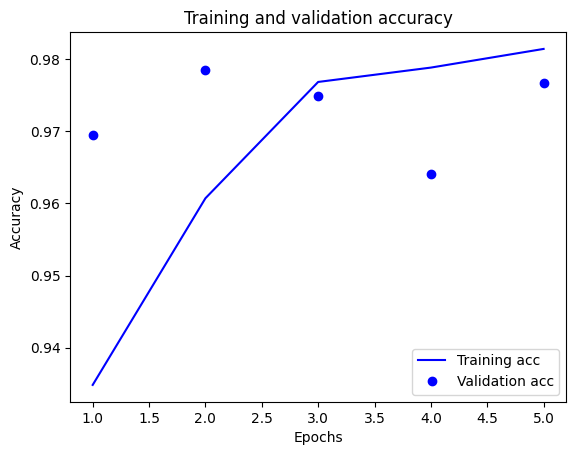

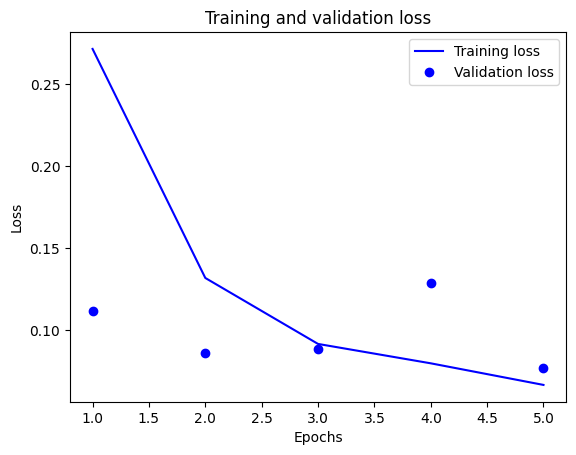

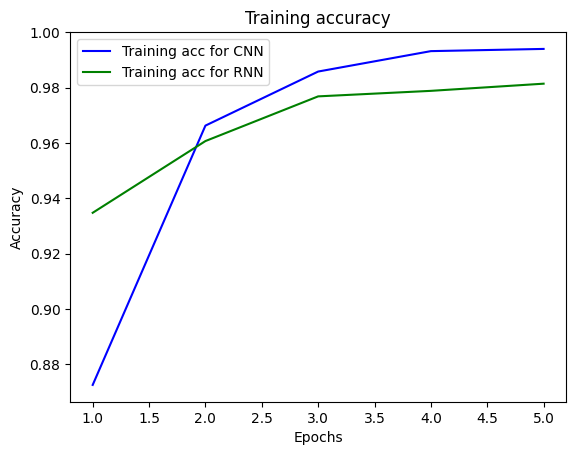

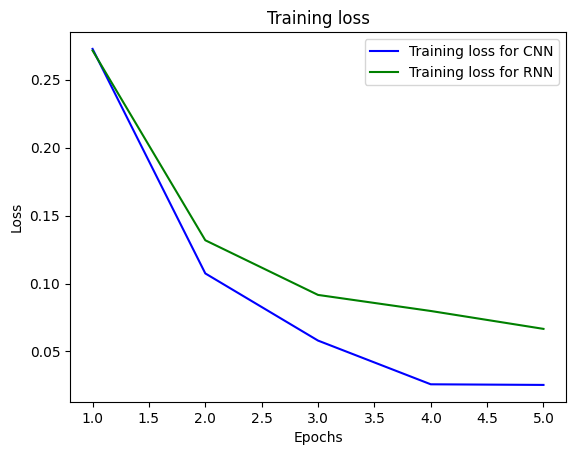

In [222]:
def cnn_plot():
    #Plotting results
    acc = history1.history['accuracy']
    val_acc = history1.history['val_accuracy']
    loss = history1.history['loss']
    val_loss = history1.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'bo', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'bo', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def rnn_plot():
    #Plotting results
    acc = history2.history['accuracy']
    val_acc = history2.history['val_accuracy']
    loss = history2.history['loss']
    val_loss = history2.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'bo', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'bo', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def mix_plot():
    #Plotting results
    acc = history1.history['accuracy']
    val_acc = history1.history['val_accuracy']
    loss = history1.history['loss']
    val_loss = history1.history['val_loss']
    
    acc2 = history2.history['accuracy']
    val_acc2 = history2.history['val_accuracy']
    loss2 = history2.history['loss']
    val_loss2 = history2.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'b', label='Training acc for CNN')
    plt.plot(epochs, acc2, 'g', label='Training acc for RNN')
    plt.title('Training accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss for CNN')
    plt.plot(epochs, loss2, 'g', label='Training loss for RNN')
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


cnn_plot()
rnn_plot()
mix_plot()

## Confusion matrix

157/157 [==============================] - 1s 5ms/step


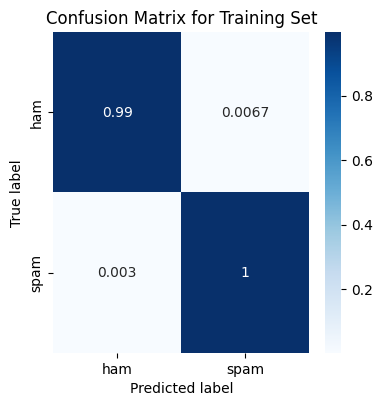

18/18 [==============================] - 0s 5ms/step


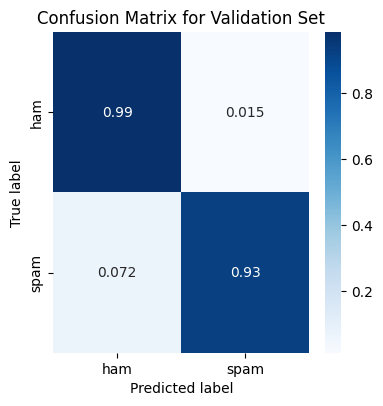

18/18 [==============================] - 0s 8ms/step


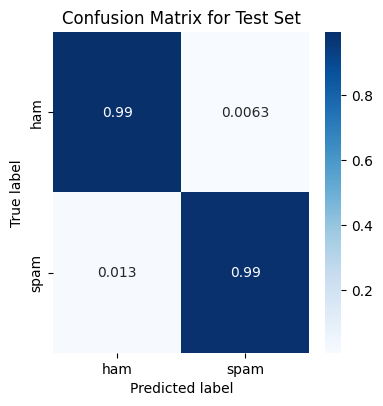

In [179]:
for_model = model1 # Choose model to use for confusion matrix

# ---------- Create a confusion matrix for the training set ----------
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

val_preds = for_model.predict(X_train_seq)

val_pred = np.argmax(val_preds, axis=1)
val_true = y_train

cm = confusion_matrix(val_true, val_pred)
cm = cm / cm.astype(float).sum(axis=1)[:, np.newaxis]

figure = plt.figure(figsize=(4,4))
sns.heatmap(cm,
            annot=True,
            cmap=plt.cm.Blues,
            xticklabels=label_names,
            yticklabels=label_names)
plt.tight_layout(pad=2)
plt.title('Confusion Matrix for Training Set')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# ---------- Create a confusion matrix for the validation set ----------
val_preds = for_model.predict(X_val_seq)

val_pred = np.argmax(val_preds, axis=1)
val_true = y_val

cm = confusion_matrix(val_true, val_pred)
cm = cm / cm.astype(float).sum(axis=1)[:, np.newaxis]

figure = plt.figure(figsize=(4,4))
sns.heatmap(cm,
            annot=True,
            cmap=plt.cm.Blues,
            xticklabels=label_names,
            yticklabels=label_names)
plt.tight_layout(pad=2)
plt.title('Confusion Matrix for Validation Set')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# ---------- Create a confusion matrix for the test set ----------
val_preds = for_model.predict(X_test_seq)

val_pred = np.argmax(val_preds, axis=1)
val_true = y_test

cm = confusion_matrix(val_true, val_pred)
cm = cm / cm.astype(float).sum(axis=1)[:, np.newaxis]

figure = plt.figure(figsize=(4,4))
sns.heatmap(cm,
            annot=True,
            cmap=plt.cm.Blues,
            xticklabels=label_names,
            yticklabels=label_names)
plt.tight_layout(pad=2)
plt.title('Confusion Matrix for Test Set')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Tuning the hyperparameters

In [ ]:
# Scikit grid search and keras classifier
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Define the model
def create_rnn_model(num_units=300, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, trainable=False, input_length=None, weights=[embedding_matrix_ft]))
    model.add(LSTM(units=64))
    model.add(Dropout(dropout_rate))

    model.add(Flatten())

    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=2, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define the model
def create_cnn_model(num_units=300, dropout_rate=0.2, learning_rate=0.001, dense_units=32, kernel_size=5, filters=[128, 64], pool_size=5):
    model = Sequential()
    model.add(Input(shape=(max_len,)))

    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, trainable=False, weights=[embedding_matrix_ft]))
    model.add(Conv1D(filters=filters[0], kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Dropout(dropout_rate))
    model.add(Conv1D(filters=filters[1], kernel_size=kernel_size, activation='relu'))

    model.add(Flatten())

    model.add(Dense(units=dense_units, activation='relu'))
    model.add(Dense(units=2, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Wrap the model in a scikit-learn-compatible wrapper
model_hp = KerasClassifier(build_fn=create_cnn_model)

# Define the parameter grid
param_grid = {
    # -------- RNN --------
    #'num_units': [32, 64, 128],
    #'dropout_rate': [0.2, 0.5],
    #'learning_rate': [0.0001, 0.001],
    #'epochs': [5],
    #'batch_size': [32, 64],


    # -------- CNN --------
    'dense_units': [32, 64],
    'kernel_size': [3, 5],
    'filters': [[128, 64], [256, 128]],
    'pool_size': [2, 5],
    'dropout_rate': [0.2, 0.5],
    'learning_rate': [0.0001, 0.001],
    'epochs': [5],
    'batch_size': [32, 64]
}

# Create a grid search object
grid_search = GridSearchCV(estimator=model_hp, param_grid=param_grid, cv=5, verbose=True, n_jobs=4)

# Fit the grid search object to the training data
grid_search.fit(X_train_seq, y_train)

# Print the best combination of hyperparameters
print("\nBest combination:", grid_search.best_params_)

In [223]:
print("Best combination: {'batch_size': 64, 'dense_units': 32, 'dropout_rate': 0.2, 'epochs': 5, 'filters': [128, 64], 'kernel_size': 3, 'learning_rate': 0.0001, 'pool_size': 2}")

Best combination: {'batch_size': 64, 'dense_units': 32, 'dropout_rate': 0.2, 'epochs': 5, 'filters': [128, 64], 'kernel_size': 3, 'learning_rate': 0.0001, 'pool_size': 2}


# Classifier analysis

In [221]:
# We can get the softmax probabilities for each sample using model.predict()
predictions=model2.predict(X_test_seq) #'(x)' does not work - What should we use as argument to model.predict? https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict

import sklearn

confusion_matrix = sklearn.metrics.confusion_matrix(y_test, np.argmax(predictions, axis=1))
print(confusion_matrix)

prec_rec_f1 = sklearn.metrics.precision_recall_fscore_support(y_test, np.argmax(predictions, axis=1), average='binary')
print("Precision:",round(prec_rec_f1[0],3), "Recall:",round(prec_rec_f1[1],3), "F1:",round(prec_rec_f1[2],3))

# print accuracy
print("Accuracy:",round(sklearn.metrics.accuracy_score(y_test, np.argmax(predictions, axis=1)),3))

# print AUC
print("AUC:",round(sklearn.metrics.roc_auc_score(y_test, np.argmax(predictions, axis=1)),3))

# print recall, precision, f1 score, accuracy for each class
print(sklearn.metrics.classification_report(y_test, np.argmax(predictions, axis=1), target_names=['0', '1']))

18/18 [==============================] - 0s 12ms/step
[[474   4]
 [  2  78]]
Precision: 0.951 Recall: 0.975 F1: 0.963
Accuracy: 0.989
AUC: 0.983
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       478
           1       0.95      0.97      0.96        80

    accuracy                           0.99       558
   macro avg       0.97      0.98      0.98       558
weighted avg       0.99      0.99      0.99       558

